<a href="https://colab.research.google.com/github/carolynchep/NumericalAnalysis/blob/main/LU_Factorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Solving systems of linear equations: LU Factorization**

Carolyne: collaborated with Clare and Ethan

## $LU$ factorization

First, practice with the myLU program to find the $LU$ decomoposition of $$A = \begin{bmatrix} 4 & 5  & 16\\ -4 &  3 &  2\\ 0 &  8 &  5 \end{bmatrix}.$$ The MyLU program is given below. You will need to add the lines of code to enter the matrix $A$, run the program, and print your results.

In [3]:
import numpy as np

def MyLU(A):
  n = A.shape[0] # get the dimension of the matrix A
  L = np.matrix( np.identity(n) ) # Build the identity part L
  U = A # start a placeholder for the U matrix
  for j in range(0,n-1): # counter for column
    for i in range(j+1,n): #  counter for row
        mult = A[i,j] / A[j,j] # the multiplication factor for row replacement
        U[i, j+1:n] = U[i, j+1:n] - mult * U[j,j+1:n]
        L[i,j] = mult # keep track of row replacements in L
        U[i,j] = 0 # build U to be upper triangular
  return L, U

A =np.matrix([[4,5,16],[-4,3,2],[0,8,5]])
L,U=MyLU(A)
print("L=\n",L)
print("U=\n",U)
print("L*U=\n",L*U)

L=
 [[ 1.  0.  0.]
 [-1.  1.  0.]
 [ 0.  1.  1.]]
U=
 [[  4   5  16]
 [  0   8  18]
 [  0   0 -13]]
L*U=
 [[ 4.  5. 16.]
 [-4.  3.  2.]
 [ 0.  8.  5.]]


## Forward substitution method

Try the lsolve program using the matrix $L$ that you found in the example above, and $b = \begin{bmatrix} 10 \\ 4 \\ -5 \end{bmatrix}$. Call the solution $y$ (you will need $y$ for the next task). The lsolve program is given below. You will need to add lines of code to enter $L$, $b$, run the program, and print your results.

In [4]:
def lsolve(L, b):
    L = np.matrix(L) # make sure L is the correct data type
    n = b.size # n is the size of b
    y = np.matrix( np.zeros( (n,1)) ) # vector in R^n of all zeros
    for i in range(n):
        # start the loop by assigning y to the value on the right
        y[i] = b[i]
        for j in range(i): # now adjust y
            y[i] = y[i] - L[i,j] * y[j]
    return(y)

L=np.matrix([[1,0,0],[-1,1,0],[0,1,1]])
b=np.matrix([[10],[4],[-5]])
y=lsolve(L,b)
print(y)

[[ 10.]
 [ 14.]
 [-19.]]


## Backward substitution method

First, **by hand do the forward substitution method to solve $Ux = y$**, where $U$ is the matrix you found from running MyLU, and $y$ is the vector that you found from running lsolve.

### Backward substitution algorithm

The following code solves the problem $Ux = y$ using backward substitution. The matrix $U$ is assumed to be upper triangular. You’ll notice that most of this code is incomplete. It is your job to complete this code, and the next exercise should help.

In [14]:
#Exercise 4.33
def usolve(U, y):
    U = np.matrix(U)
    n = y.size
    x = np.matrix( np.zeros( (n,1)))
    for i in range(n-1, -1, -1):     # what should we be looping over?
        x[i] = y[i]/U[i,i]      # what should we be dividing by?
        for j in range(n-1, i, -1): # what should we be looping over:
            x[i] = x[i] - U[i,j] * x[j] / U[i,i]# complete this line
             # ... what does the previous line do?
    return(x)

U=np.matrix([[1,0,0],[-1,1,0],[0,1,1]])
y=np.matrix([[10],[4],[-5]])
x=usolve(U,y)
print(x)

[[10.]
 [ 4.]
 [-5.]]


In [15]:
#Exercise 4.79
A=np.random.randn(5,5)
print(MyLU(A))
def detSolve(A):
  A=np.matrix(A)
  L,U=MyLU(A)
  n=len(U)
  detL=1
  detU=1
  for i in range(n):
    detL *= L[i,i]
    detU *= U[i,i]
  detA= detL*detU
  return detA
print(detSolve(A))
print(np.linalg.det(A))

(matrix([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.30240547,  1.        ,  0.        ,  0.        ,  0.        ],
        [-0.25529688,  3.10752377,  1.        ,  0.        ,  0.        ],
        [-0.36683851, -2.61728094, -2.13768851,  1.        ,  0.        ],
        [ 0.70551208,  0.63612618,  1.68173835, -0.93301357,  1.        ]]), array([[ -1.91787195,  -0.04987747,   1.36690106,  -0.62332605,
         -1.51030095],
       [  0.        ,   0.68395983,   0.25649879,   1.64449623,
         -0.84504155],
       [  0.        ,   0.        ,  -1.08047277,  -6.46960742,
          2.08931159],
       [  0.        ,   0.        ,   0.        , -10.3513371 ,
          2.23310149],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.73575699]]))
-10.794309717021976
-10.794309717021978


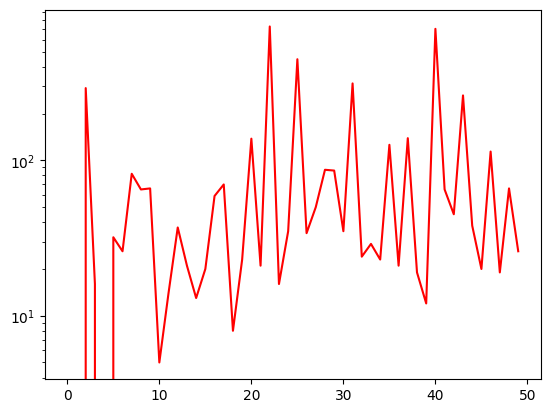

In [16]:
#4.80
import numpy as np
import random
import matplotlib.pyplot as plt

N=[]
errorlist = []
for i in range(50):
  #n= random.randrange(150)
  A = np.matrix( np.random.randn(i,i) )  #a random matrix  A of size  n×n.
  b = np.matrix( np.random.randn(i,1) )  # a random vector b in R^n
  n = len(A)
  # using myLU
  L,U=MyLU(A)
  y=lsolve(L,b)
  x=usolve(U,y)
  exact = np.linalg.solve(A,b) # Find Python’s answer to the problem  Ax=b=0
  error=np.linalg.norm(x - exact)  #Find the error between your answer and the exact answer using the code
  errorf = error. astype(int)
  errorlist.append(errorf)
  N.append(n)




#that shows how the error behaves as the size of the problem changes

plt.semilogy(N, errorlist,'r')

#Conculsion: As the n value increases the error increases. this tells us that the LU decompostion
